In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import os
import pandas as pd
import json

In [ ]:
# This code makes plots from pre-computed runs of our model selection algorithms

# look at FC

In [ ]:
#code to read in results from 100 runs of TTTS and non-adaptive

In [3]:
#read in results

Approaches=["FC_non_adapt","TTTS"]
models_considered=["8"]
confidence_levels=["0.05","0.1","0.2","0.5"]

required_num_iterations={} 
chosen_models={}
for approach in Approaches:
        required_num_iterations[approach]={}
        chosen_models[approach]={}
        for models in models_considered:
            required_num_iterations[approach][models]={}
            chosen_models[approach][models]={}
            for confidence in confidence_levels:
                seeds=os.listdir("./"+approach+"/"+models+"/"+confidence)
                required_number_of_iteration=[]
                chosen_model=[]
                for seed in seeds:
                    required_number_of_iteration.append(json.load(open("./"+approach+"/"+models+"/"+confidence+"/"+seed+"/"+'num.json')))
                    chosen_model.append(np.argmax(json.load(open("./"+approach+"/"+models+"/"+confidence+"/"+seed+"/"+'pi.json'))))
                required_num_iterations[approach][models][confidence]=np.array(required_number_of_iteration)
                chosen_models[approach][models][confidence]=np.array(chosen_model)
        
    

In [9]:
#max across the 100 runs of standard non-adaptive model selection on 8 models with confidence level 0.5
np.max(required_num_iterations["FC_non_adapt"]["8"]["0.5"])

208

In [10]:
#max across the 100 runs of TTTS on 8 models with confidence level 0.5
np.max(required_num_iterations["TTTS"]["8"]["0.5"])

80

In [19]:
#Proportion correctly selected the optimal acorss 100 runs of standard non-adaptive model selection on 8 models with confidence level 0.5
np.count_nonzero(chosen_models["FC_non_adapt"]["8"]["0.5"]==3)/len(chosen_models["FC_non_adapt"]["8"]["0.1"])

0.786

In [17]:
#Proportion correctly selected the optimal acorss 100 runs of standard non-adaptive model selection on 8 models with confidence level 0.5

np.count_nonzero(chosen_models["TTTS"]["8"]["0.5"]==3)/len(chosen_models["FC_non_adapt"]["8"]["0.1"])

0.742

# look at FB

In [ ]:
#code to read in results from selecting between 12 TDSA models using SH and non-adaptive

In [21]:
#read in results

Approaches=["FB_non_adapt","SH"]
models_considered=["12"]

proportions={} 

for approach in Approaches:
        proportions[approach]={}
        for models in models_considered:
            if approach=="SH":
                Ts=os.listdir("./"+approach+"/"+models)
                Ts.sort(key=int)
                proportion=[]
                for t in Ts:
                    proportion.append(json.load(open("./"+approach+"/"+models+"/"+t+"/"+'prop_adaptive.json')))
                proportions[approach][models]=proportion
            if approach=="FB_non_adapt":
                Ts=os.listdir("./"+approach+"/"+models)
                Ts.sort(key=int)
                proportion=[]
                for t in Ts:
                    proportion.append(json.load(open("./"+approach+"/"+models+"/"+t+"/"+'prop_non_adaptive.json')))
                proportions[approach][models]=proportion
            
      

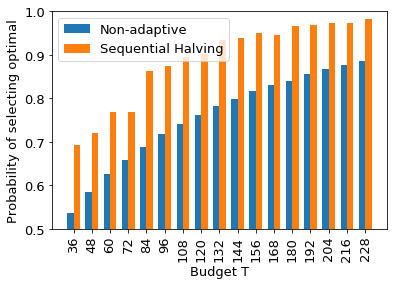

In [22]:
#make plot]
plt.rcParams.update({'font.size': 13})
ind = np.arange(1,18) 
width = 0.35       
plt.bar(ind, proportions["FB_non_adapt"]["12"][1:], width, label='Non-adaptive')
plt.bar(ind + width, proportions["SH"]["12"][1:], width,
    label='Sequential Halving')

plt.ylabel('Probability of selecting optimal')

plt.xticks(ind + width / 2,Ts)
plt.xticks(rotation=90)
plt.xlabel("Budget T")
plt.legend(loc='best')
plt.ylim(0.5,1)
plt.show()